# Tópicos:
- Porque usar Teste de Hipóteses? (Feito)
- Introdução a Teste de Hipóteses (Maioria feito)
- Teste de Diferença de Proporções (Feito)
- Case Real: Análise de retrofits usando teste não paramétrico (Ainda vou colocar)

In [12]:
import pandas as pd
from plotnine import *
import numpy as np
from scipy.stats import mannwhitneyu, norm
from statsmodels.stats.proportion import proportions_ztest
from dados import resultados_baseline, resultados_desafiante, dados_parte1

## Porque usar Teste de Hipóteses?
- Adiciona mais credibilidade e legitimidade aos seus estudos
- Dá mais confiança e rigor científico as suas hipóteses de interesse
- Você consegue ter evidências estatísticas com base em probabilidade

## Hipótese: O Lead Time Médio da Squad X melhorou com o retrofit

In [13]:
dados_parte1

,Periodo,ANO-MES,LEAD TIME MEDIO
0,Antes do retrofit,2022-01,47
1,Antes do retrofit,2022-02,33
2,Antes do retrofit,2022-03,48
3,Antes do retrofit,2022-04,52
4,Antes do retrofit,2022-05,41
5,Antes do retrofit,2022-06,66
6,Antes do retrofit,2022-07,65
7,Antes do retrofit,2022-08,63
8,Antes do retrofit,2022-09,43
9,Antes do retrofit,2022-10,57


## Uma possível solução: Média do Lead Time agrupado por período

In [14]:
dados_parte1.groupby("Periodo")["LEAD TIME MEDIO"].mean()

Periodo
Antes do retrofit     52.250000
Depois do retrofit    41.333333
Name: LEAD TIME MEDIO, dtype: float64

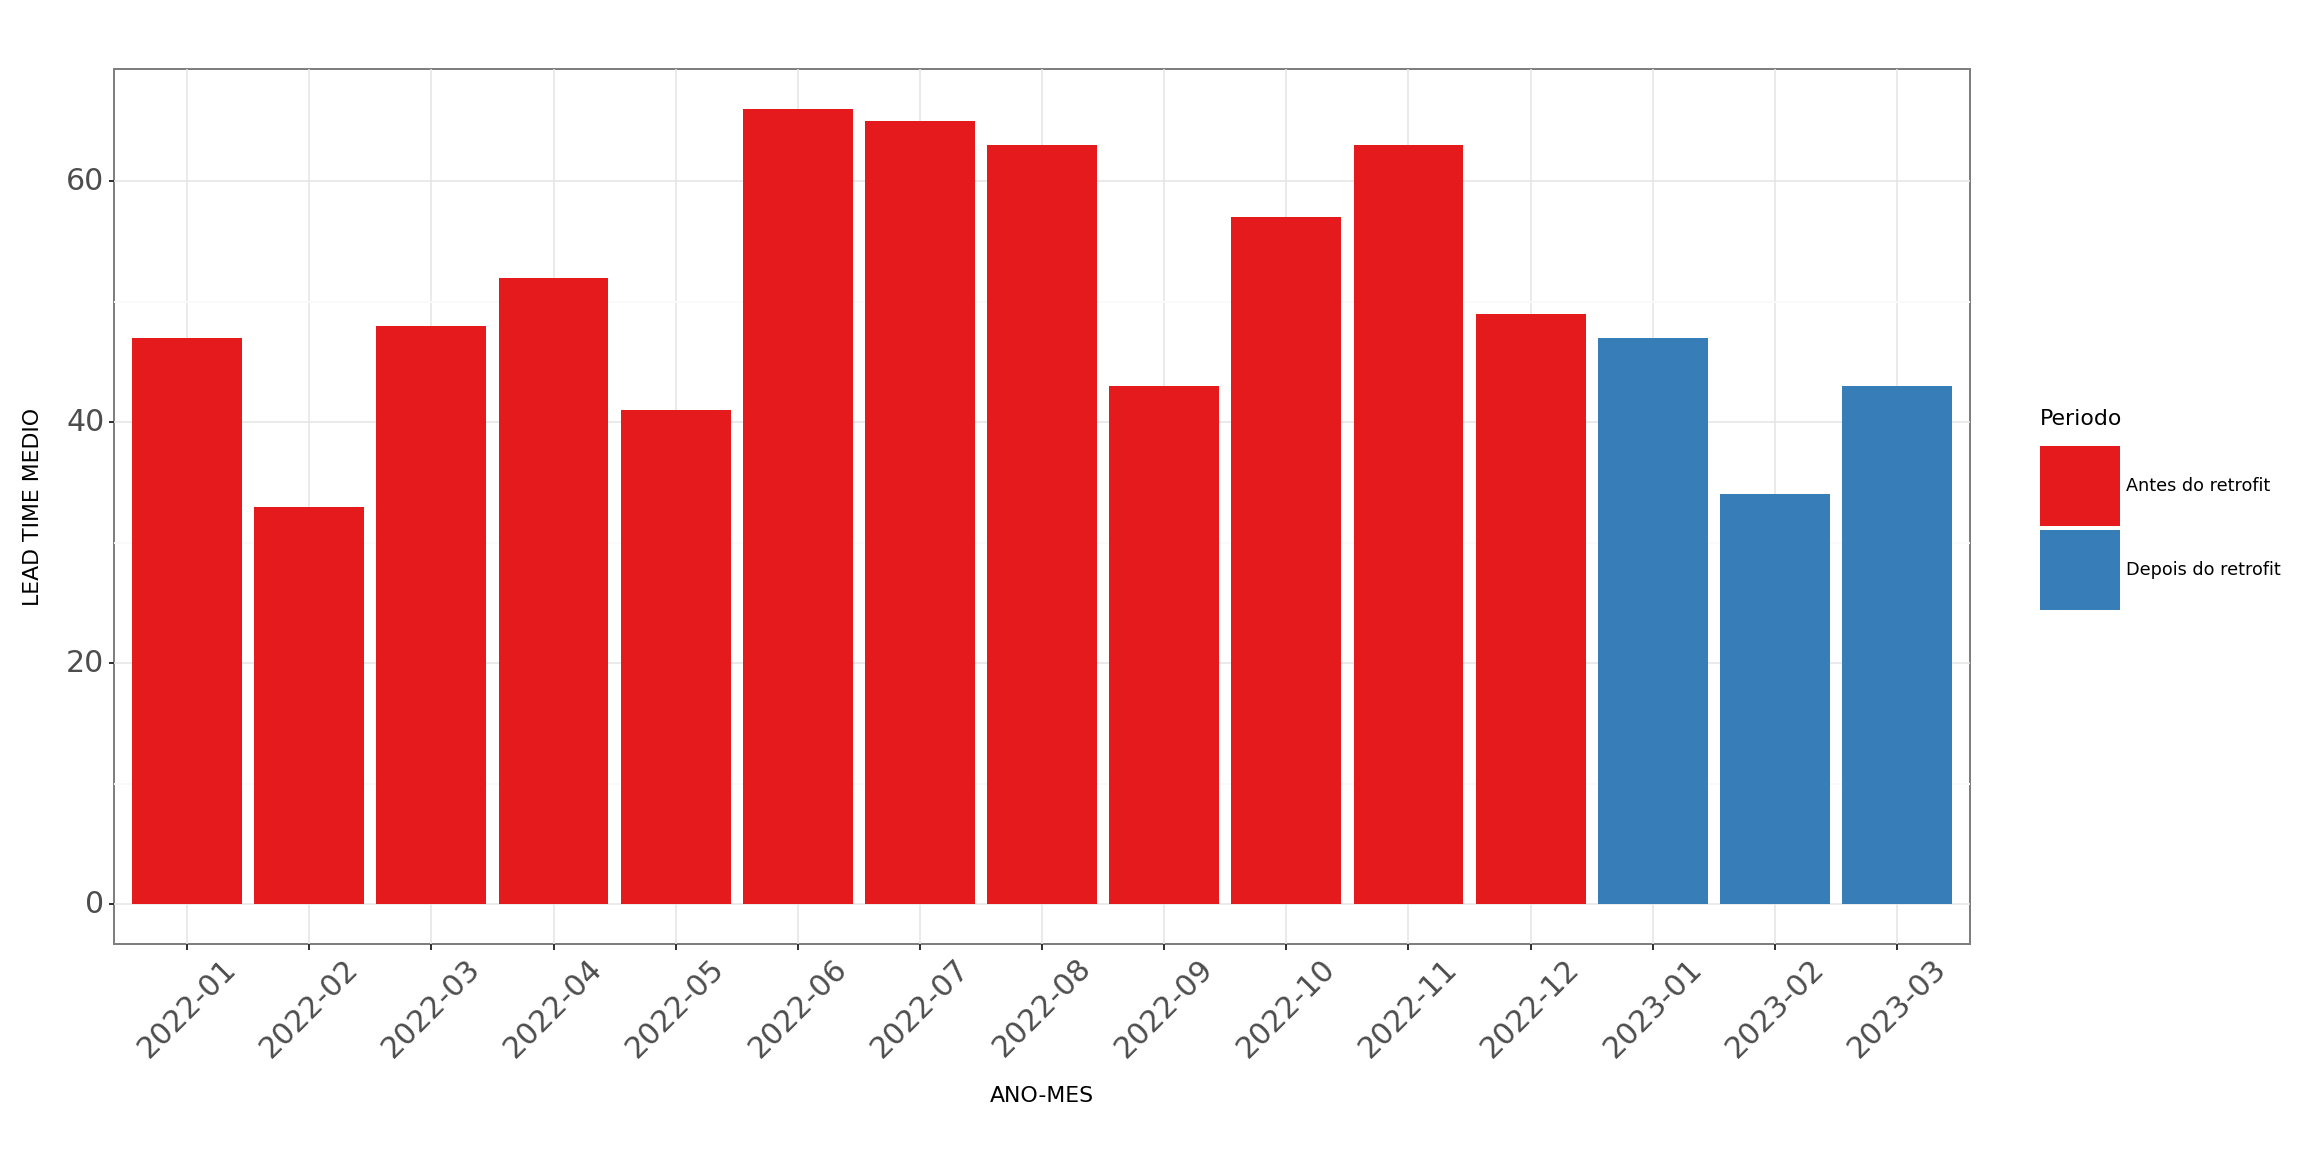

<Figure Size: (1152 x 576)>

In [15]:
(ggplot(dados_parte1)
+ aes(x="ANO-MES", y="LEAD TIME MEDIO", fill="Periodo")
+ geom_col()
+ theme_bw()
+ theme(axis_text_x = element_text(angle = 45, size=15),
        axis_text_y = element_text(size=15),
        figure_size=(16, 8),
        legend_key_size=40)
+ scale_fill_brewer(type="qual", palette="Set1"))

## Teste de hipóteses considerando apenas os três primeiros meses

In [16]:
res_teste = mannwhitneyu(x=dados_parte1[dados_parte1["Periodo"] == "Antes do retrofit"]["LEAD TIME MEDIO"], 
                         y=dados_parte1[dados_parte1["Periodo"] == "Depois do retrofit"]["LEAD TIME MEDIO"],
                         alternative="greater")

### Conclusão: Evidências que o Lead Time não melhorou significativamente

In [17]:
np.round(res_teste.pvalue, 2)

0.06

#                               Introdução à teste de hipóteses
- O que são hipóteses
- O que são probabilidade do erro tipo 1 e erro tipo 2
- O que é valor p
- O que é a estatística de teste
- Como é realizada a tomada de decisão?

## O que são hipóteses estatísticas?

### São afirmações sobre alguma métrica dos dados


# Exemplos:

### Exemplo 1: Minha hipótese é de que o Lead Time Médio da Squad X melhorou depois de um retrofit.

- Hipótese Nula: Lead Time Médio da Squad X **não melhorou** significativamente
- Hipótese Alternativa: Lead Time Médio da Squad X **melhorou** significativamente

### Exemplo 2: Minha hipótese é de que um sistema de recomendação desenvolvindo através de Machine Learning é melhor do que a recomendação atualmente implantada.

- Hipótese Nula: O sistema de recomendação usando Machine Learning **não é melhor significativamente** do que a recomendação atualmente fornecida.
- Hipótese Alternativa: O sistema de recomendação usando Machine Learning **é melhor significativamente** do que a recomendação atualmente fornecida.

### Exemplo 3: Minha hipótese é de que a vacina desenvolvida é eficaz contra a COVID-19

- Hipótese Nula: A vacina desenvolvida **não é eficaz** contra a COVID-19
- Hipótese Alternativa: A vacina desenvolvida **é eficaz** contra a COVID-19


# O que são a probabilidade do erro tipo 1 e a probabilidade do erro tipo 2

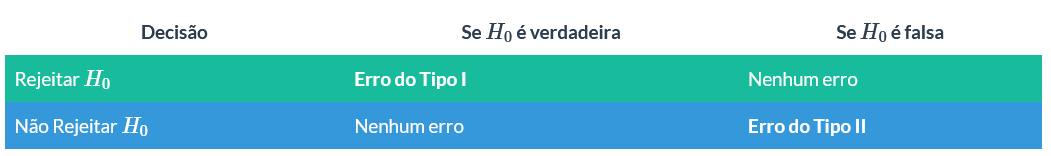

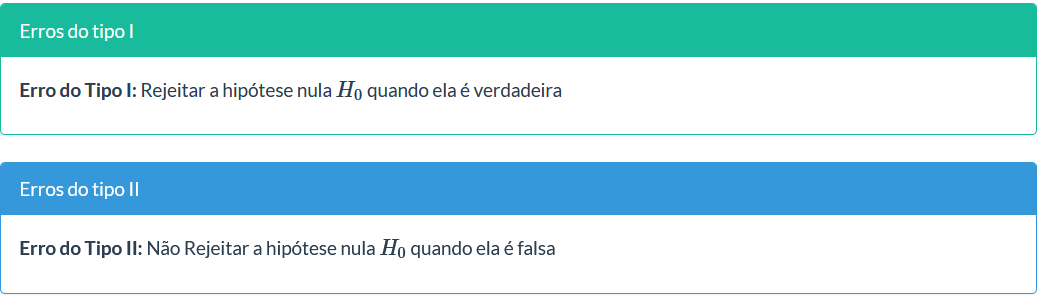

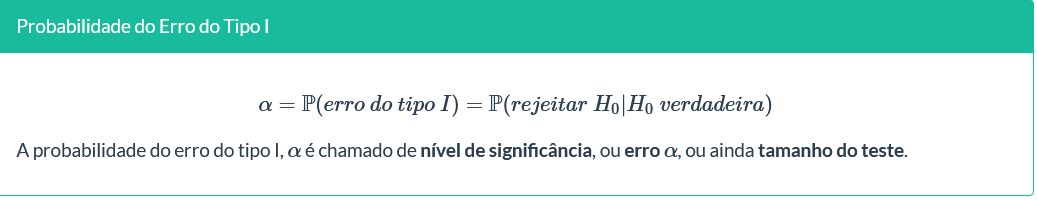

# O que é o valor-p?

- O valor-p é uma probabilidade que mensura o quão provável é a hipótese nula de ser verdade.


# O que é a estatística de teste?

- A estatística de teste é uma fórmula matemática usada para calcular o valor-p.


# Como é realizada a tomada de decisão?

- Definimos as hipóteses estatísticas
- Definimos a probabilidade do erro do tipo 1
- Calculamos a estatística de teste
- Calculamos o valor-p
- Comparamos o valor-p com a probabilidade do erro tipo 1 para tomarmos a decisão de rejeitar ou não a hipótese nula

## Teste de Diferença de Proporções
### Queremos comparar duas versões de sistema de recomendação para verificar se vale a pena substituir a versão atual na DashFlix

In [18]:
print("Resultados do acertos e erros do sistema de recomendação baseline: \n", resultados_baseline)
print("\n")
print("Resultados do acertos e erros do sistema de recomendação desafiante: \n", resultados_desafiante)

Resultados do acertos e erros do sistema de recomendação baseline: 
 [1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1]


Resultados do acertos e erros do sistema de recomendação desafiante: 
 [1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 1 0 1]


## Hipóteses Estatísticas:

- Hipótese Nula: A assertividade do sistema de recomendação desafiante **não é melhor** significativamente do que o sistema de recomendação baseline 
- Hipótese Alternativa: A assertividade do sistema de recomendação desafiante **é melhor** significativamente do que o sistema de recomendação baseline

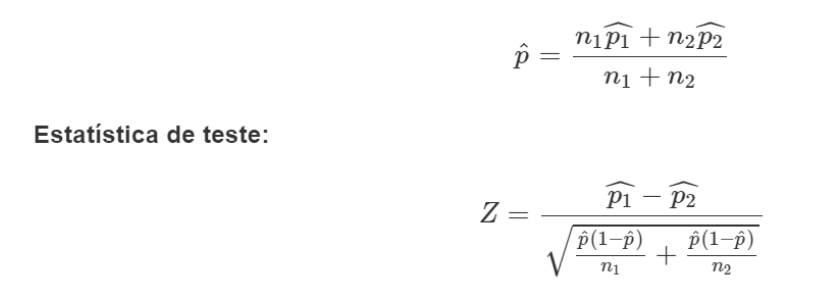

In [19]:
resultados_desafiante

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1])

In [20]:
p1 = np.mean(resultados_desafiante)
p2 = np.mean(resultados_baseline)

n1 = len(resultados_desafiante)
n2 = len(resultados_baseline)

In [21]:
print("Assertividade do sistema de recomendação baseline: ", np.round(p1, 2))
print("Assertividade do sistema de recomendação desafiante: ", np.round(p2, 2), "\n")

print("Tamanho amostral do sistema de recomendação baseline: ", n1)
print("Tamanho amostral do sistema de recomendação desafiante: ", n2)

Assertividade do sistema de recomendação baseline:  0.69
Assertividade do sistema de recomendação desafiante:  0.52 

Tamanho amostral do sistema de recomendação baseline:  156
Tamanho amostral do sistema de recomendação desafiante:  256


In [22]:
prob_erro_tipo1 = 0.05

## Calculando p_hat:
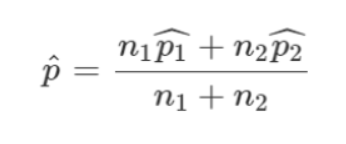

In [23]:
p_hat = (n1*p1 + n2*p2)/(n1 + n2)

## Calculando denominador:

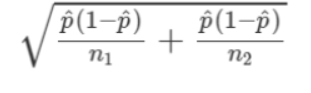

In [24]:
var_p = p_hat*(1-p_hat)
denominador = np.sqrt(var_p/n1 + var_p/n2)

# Calculando a estatística de teste Z score:
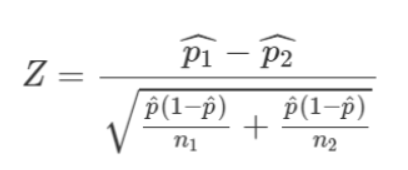

In [25]:
z_score = (p1 - p2)/denominador

In [26]:
z_score

3.3966690721639003

## Calculando o valor-p:
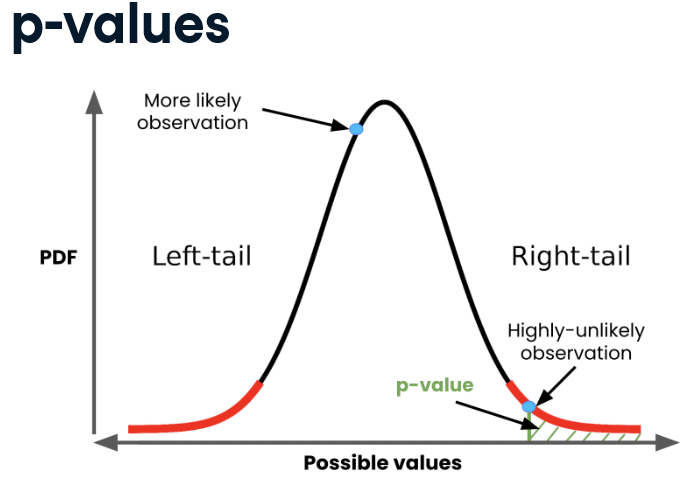

In [27]:
valor_p = 1 - norm.cdf(z_score, loc=0, scale=1)
valor_p

0.000341057020808222

# Tomada de decisão:
### Rejeitar a hipótese nula, resultado em que o sistema de recomendação desafiante teve uma performance melhor significativamente.

In [28]:
valor_p < prob_erro_tipo1

True

## Relizando o teste de hipóteses usando a função:

In [29]:
resultados_teste = proportions_ztest(count = [len(resultados_desafiante[resultados_desafiante == 1]),
                           len(resultados_baseline[resultados_baseline == 1])],
                            nobs = np.array([n1, n2]),
                            alternative = "larger")

In [30]:
resultados_teste

(3.3966690721639003, 0.0003410570208081687)

# Case Real: Análise de retrofits usando teste não paramétrico

## Nesse estudo o objetivo era analisar se as squads melhoram ou pioram significativamente depois do retrofit.

## Colocar análise